# Distribución estadística 

Algunos modelos de machine learning requieren que la variable a predecir (objetivo) se comporte estadísticamente de una manera determinada, por ejemplo: 

* LM-> distribución normal

* GLM-> distribución exponencial.

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import seaborn as sns
import os
from fitter import Fitter



## Función de probabilidad

1. Un experimento estadístico es cualquier proceso que proporciona datos. 
2. Estos datos tienen que convertirse en descripciones numéricas del resultado.
3. Estas descripciones numéricas son observaciones aleatorias. 
4. A las observaciones aleatorias se les considera como la expresión en cada caso concreto de una variable aleatoria que toma valores en los resultados del experimento.

**Variable aleatoria** es una variable matemática cuyos posibles valores son las descripciones numéricas de todos los resultados posibles de un experimento
estadístico.

In [2]:
import random #float [0,1]
for i in range(5):
    print(random.random())
    print(random.randrange(1, 100, 2))#int [a,b] step 


0.0964716217732473
85
0.5743788514678988
73
0.13417923478887628
51
0.43610502817909724
5
0.1562916069147332
13


Se pueden distinguir distintos tipos de variables aleatorias:

1. _Variables cuantitativas_: son las que resultan de experimentos cuyos resultados son directamente numéricos.

2. _Variables cualitativas_: son las que proceden de experimentos cuyos resultados expresan una cualidad no numérica que necesita ser cuantificada.

3. _Variables discretas_: son aquellas que se define sobre un espacio muestral numerable, finito o infinito. 

4. _Variables continuas_: son aquellas que se definen sobre un espacio asimilable al conjunto de los números reales, es decir, un espacio no numerable

### Variables aleatorias discretas

Una variable aleatoria discreta toma cada uno de sus valores con una determinada probabilidad.

**Función de probabilidad**: es una función tal que, al sustituir x por un valor de la variable, el valor que toma la función es la probabilidad de que la variable X asuma el valor x.

La función de probabilidad se representa como: 

$f(x)=P(X=x)$

Las funciones de probabilidad sólo se definen para los valores de la variable aleatoria y deben cumplir tres propiedades:

1. $\forall  x \in R, f(x) \geq 0$
2. $\sum_{x} f(x) = 1$
3. $P(X=x)=f(x)$

**Función de distribución** La función de distribución se define para todos los números reales, no sólo para los valores de la variable. Su máximo es siempre 1 pues cuando el valor que se sustituye es mayor o igual que el valor máximo de la variable, la probabilidad de que ésta tome valores menores o iguales que el sustituido es la probabilidad del espacio muestral.

### Variables aleatorias continuas

**Función de densidad** Una variable aleatoria continua tiene la característica de tomar cada uno de sus valores con probabilidad infinitesimal. 

Puede calcularse la probabilidad de que la variable tome valores en determinados intervalos.

$P(a \leq X \leq b) = P(X = a) + P(a < X < b) + P(X = b) = P(a < X < b)$

La función de densidad debe cumplir tres condiciones análogas a las de la función de probabilidad:

1. $\forall  x \in R f(x) \geq  0$
2. $\int_{-\infty}^{\infty} f(x) dx = 1$
3. $P(a \leq X \leq b)=\int_{a}^{b}f(x) dx$

**Función de densidad** es una función continua tal que su integral entre los extremos de un intervalo nos da el valor de la probabilidad de que X tome valores en ese intervalo.

$P(a \leq X \leq b) = \int_{a}^{b} f(x) dx$


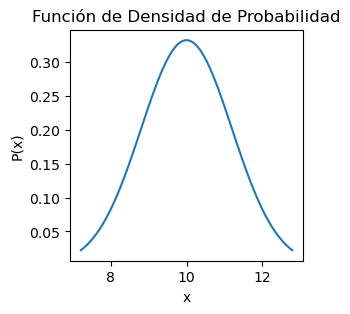

In [3]:
# Graficando Normal
mu, sigma = 10, 1.2
x = np.linspace(st.norm(mu, sigma).ppf(0.01),
                  st.norm(mu, sigma).ppf(0.99), 100)
normal = st.norm(mu, sigma).pdf(x) # FDP
plt.figure(figsize=(3,3))
plt.plot(x, normal, label='normal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('P(x)')
plt.xlabel('x')
plt.show()

### Distribución conjunta de dos variables

Cuando tenemos dos variables aleatorias X y Y, si queremos estudiarlas conjuntamente debemos establecer una relación que ligue los valores de una con los de la otra.

Para variables discretas, se puede establecer una función de probabilidad para las posibles parejas de valores de ambas variables; a esta función se le llama **función de probabilidad conjunta, f(x,y).**

$P[(X=x)\cap(Y=y)]= f(x,y)$

Que puede ser discreta o continua y que cumple las condiciones de la función de probabilida o función de densiadad


1. $\forall  x,y \in R f(x,y) \geq  0$
2. $\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} f(x,y) dx dy = 1$
3. $P[(x,y)\in A]=\int\int_A f(x,y) dx dy$

Existen varias librerías en python que permiten identificar a qué distribución se ajustan mejor los datos, una de ellas es fitter. Esta librería permite ajustar cualquiera de las 80 distribuciones implementadas en scipy.

### Valor esperado de una variable

**Variables aleatorias independientes**: dos variables aleatorias X y Y, discretas o continuas cuyas funciones de probabilidad o densidad son $g(x)$ y $h(y)$, respectivamente, con función de probabilidad o densidad conjunta $f(x,y)$, son estadísticamente independientes si y sólo si $f(x,y)=g(x)\cdot f(x)$

Supongamos que hemos realizado n veces un experimento aleatorio que genera una variable X. El valor medio del experimento en estas n repeticiones es la suma de los productos de los valores de la variable por su frecuencia relativa. Cuando n sea igual a infinito, el valor medio del experimento se llama valor esperado o esperanza matemática:

$\mathbb{E}[X]=x_1p(X=x_1)+\ldots+x_ip(X=x_i)=\sum_i^nx_ip(x_i)$

Para una variable aleatoria continua, la esperanza se calcula mediante la integral de todos los valores y la función de densidad:

$\mathbb{E}[X]=\int_{-\infty}^\infty x f(x) dx$.

La esperanza también se suele simbolizar con $\mathbb{E}[X]=\mu$

**Propiedades**

1. Si X es siempre positiva, entonces siempre lo es $\mathbb{E}[X]$.
2. La esperanza matemática de una constante es igual a esa misma constante, es decir, $\mathbb {E}[c]=c$.
3. Si X está delimitada por dos números reales, a y b, tal que: $a \leq X \leq b$, entonces también lo está su media: $a \leq \mathbb{E}[X] \leq b$
4. Linealidad. Si existe $\mathbb{E}[X]$ y se considera $Y=a+bX$, entonces $\mathbb{E}[Y]=\mathbb{E}[a+bX]=a+b\mathbb{E}[X]$

además la esperanza es un operador **lineal**.

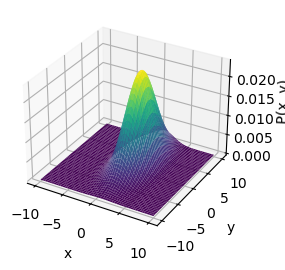

In [4]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
# Create grid and multivariate normal
x = np.linspace(st.norm(mu, sigma).ppf(0.01),
                  st.norm(mu, sigma).ppf(0.99), 100)

x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y
# Create a frozen RV object
mean = np.array([1, 2])
cov  = np.array([[3,0],[0,15]])
rv = multivariate_normal(mean,cov)
# Make a 3D plot
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('P(x, y)')
plt.show()


## Momentos de una variable

Dada una variable aleatoria X con función de probabilidad o densidad f(x) podemos definir una función de X que sea igual a la diferencia entre la variable y su media elevada a un exponente entero no negativo:

$z(x)=(x-\mu)^k$ siendo  $k\in Z, k\geq 0$

El valor esperado de $z(x)$ es el k-ésimo momento de la variable X respecto a su origen:

$\mu_2=\mathbb{E}[(x-\mu )^2]= \mathbb{E}[X^{2}]-\mu^{2}=\mathbb{E}[X^{2}]-\mathbb{E}[X]^{2}= 
\left \{ \begin{matrix} \sum_x (x-\mu)^2 f(x) & si X es discreta \\ 
\int_{-\infty}^{\infty} (x-\mu)^2 f(x) dx & si X es continua \end{matrix}\right.$

$k=0, \mu_0=1$;

$k=1, \mu_1=\mathbb{E}[(x-\mu)^1]=
\mathbb{E}[(x-\mu)]=\mathbb{E}[X]-\mu=0$

$k=2, \mu_2=\mathbb{E}[(x-\mu )^2]=\sigma^2$ 

### Varianza

La varianza de una variable mide la dispersión de sus valores respecto al valor central $\mu$

$\mu_2=\mathbb{E}[(x-\mu )^2]= \mathbb{E}[X^{2}]-\mu^{2}=\mathbb{E}[X^{2}]-\mathbb{E}[X]^{2}= 
\left \{ \begin{matrix} \sum_x (x-\mu)^2 f(x) & si~ X~ es~ discreta \\ 
\int_{-\infty}^{\infty} (x-\mu)^2 f(x) dx & si~ X~ x~ es~ continua \end{matrix}\right.$


Es decir, la varianza de una variable es igual a la media de los cuadrados menos el cuadrado
de la media.

La varianza se expresa en unidades cuadráticas que no siempre tienen una interpretación clara. 

**Desviación estandar $\sigma$:** Medida de la
dispersión que que se calcula como la raíz cuadrada positiva de la varianza. La desviación estandar se mide en las mismas unidades que la
variable

$\sigma_x =+\sqrt{\sigma^2_x}$

La desviación estandar no resuelve todos los problemas que se pueden plantear, por ejemplo la comparación de situaciones en las que la unidad de medida sea diferente. Para resolver esta cuestión se define una medida adimensional de
la variabilidad que es el coeficiente de variación, $C_V$, que se calcula como el cociente entre la desviación típica y la media.

$C_V=\frac{\sigma}{\mu}$

o porcentual

$C_V=100 \cdot\frac{\sigma}{\mu}$

### Varianza de variables asociadas

Supongamos que tenemos dos variables aleatorias X y Y, discretas o continuas, con función
de probabilidad o densidad conjunta f(x,y) y definimos una función z(x,y):

$z(x,y)=(x-\mu_x)(y-\mu_y)$

Al valor esperado de z(x,y) se le llama **covarianza $\sigma_{xy}$** o **cov(x,y)** de las variables X y Y.

$\mu_{xy}=\mathbb{E}[(x-\mu_{x})][(y-\mu_{y})]=$
$\left\{\begin{matrix} 
\sum_x\sum_y (x-\mu_x)(y-\mu_y) f(x,y) &
si~ X~ y~ Y~ son~ discreta~ \\ 
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} (x-\mu_x)(y-\mu_y) f(x,y) dx & 
si~ X~ y~ y~ son~ continua \end{matrix}\right.$

La covarianza es una medida de la variación común a dos variables y, por tanto, una medida
del grado y tipo de su relación.
1. $\sigma_{xy}$ es positiva si los valores más grandes de X están asociados a los valores más grandes de Y y viceversa.
2. $\sigma_{xy}$ es negativa si los más bajos de X están asociados a los valores más bajos de Y y
viceversa.
3. Si X y Y son variables aleatorias independientes cov(x,y) = 0 (la independencia es condición suficiente pero no necesaria para que la cov(x,y) sea nula.)

La covarianza de dos variables se puede calcular como:

$\sigma_{xy}=\mathbb{E}[(x-\mu_x)(y-\mu_y)]=\mathbb{E}[X\cdot Y]-\mu_x \mu_y=\mathbb{E}[X\cdot Y]-\mathbb{E}[X]\cdot\mathbb{E}[Y]$

La covarianza se expresa en términos del producto de las unidades de medida de
ambas variables, lo cual no siempre es fácilmente interpretable. Por otra parte también es difícil comparar situaciones diferentes entre sí. Ambos problemas se solucionan mediante la definición del coeficiente de correlación.

**Coeficiente de correlación $\rho$:** Es el cociente entre la covarianza y el producto de las desviaciones estandar de las dos variables.

$\rho=\frac{\sigma_{xy}}{\sigma_x\sigma_y}$

1. La correlación toma valores entre -1 y 1, siendo su signo igual al de la covarianza.
2. Correlaciones con valor absoluto 1 implican que existe una asociación matemática lineal perfecta, positiva o negativa, entre las dos variables.
3. Correlaciones iguales a 0 implican ausencia de asociación (las variables independientes tienen correlación 0, pero la independencia es condición suficiente pero no necesaria.)
4. Correlaciones con valores absolutos intermedios indican cierto grado de asociación entre los valores de las variables.

$k=2, \mu_2=\mathbb{E}[(x-\mu )^2]=\sigma^2$ 

La covarianza se expresa en términos del producto de las unidades de medida de
ambas variables, lo cual no siempre es fácilmente interpretable. Por otra parte también es difícil comparar situaciones diferentes entre sí. Ambos problemas se solucionan mediante la definición del coeficiente de correlación.

**Coeficiente de correlación $\rho$:** Es el cociente entre la covarianza y el producto de las desviaciones estandar de las dos variables.

$\rho=\frac{\sigma_{xy}}{\sigma_x\sigma_y}$

1. La correlación toma valores entre -1 y 1, siendo su signo igual al de la covarianza.
2. Correlaciones con valor absoluto 1 implican que existe una asociación matemática lineal perfecta, positiva o negativa, entre las dos variables.
3. Correlaciones iguales a 0 implican ausencia de asociación (las variables independientes tienen correlación 0, pero la independencia es condición suficiente pero no necesaria.)
4. Correlaciones con valores absolutos intermedios indican cierto grado de asociación entre los valores de las variables.

$k=2, \mu_2=\mathbb{E}[(x-\mu )^2]=\sigma^2$ 

### Asimetría

El tercer momento respecto de la media, mide la asimetría de la distribución, es decir, si
existen o no observaciones muy extremas en algún sentido con frecuencias razonablemente altas.

$k=3, \mu_3=\mathbb{E}[(x-\mu)^3]$ 


1. Si la asimetría es negativa, la variable toma valores muy bajos con mayor frecuencia que valores muy altos y (asimétrica hacia la izquierda). 

2. Si la asimetría es positiva, la variable toma valores muy altos con mayor frecuencia que valores muy bajos (asimétrica hacia la derecha). 

3. Si la asimetría es cero, los valores bajos y altos de la variable tienen probabilidades iguales (por ejemplo la distribución normal)

La asimetría tiene el mismo problema que la varianza y la covarianza en cuanto a sus
unidades de medida y, por ello, normalmente se utiliza una medida adimensional de la asimetría
que es el coeficiente de asimetría, $g_1$ , que se calcula como el cociente entre el tercer momento y el cubo de la desviación estandar.

$g_1=\frac{\mu_3}{\sigma_3}$

### Curtosis

El cuarto momento respecto de la media, mide la forma de la distribución de probabilidad o **curtosis**.

$k=4, \mu_4=\mathbb{E}[(x-\mu)^4]$ 

1. Curtosis pequeña (platicúrticas): curvas o histogramas con colas cortas y aspecto aplanado o en meseta.

2. Curtosis grande (leptocúrtica): gráfica alta y estilizada, con colas largas y pesadas.

La curtosis de una variable siempre es positiva y se mide en la unidades de la variable
elevadas a potencia 4. Por tanto, tiene los mismos problemas relacionados con las
unidades de medida y las escalas que los momentos menores.

**Coefeiciente de curtosis** $g_2$: Medida adimensional de la curtosis, se calcula como el
cociente entre el cuarto momento y el cuadrado de la varianza, al que se le resta 3 unidades. Esta corrección se debe a que, sin ella, las variables normales tendrían coeficiente de curtosis igual a 3; al restar 3 conseguimos que el coeficiente de curtosis de la variable normal sea 0 y que las variables platicúrticas tengan coeficiente de curtosis negativo y la leptocúrticas positivo.

$g_2=\frac{\mu_4}{\sigma_4}-3$

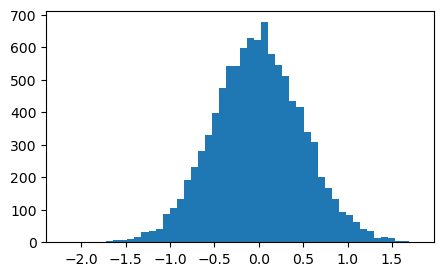

Estadistica: media -0.013175007636645324 varianza 0.2537488400213044 asimetría 0.013979646622012018 curtosis 0.04429298282619465


In [5]:

gauss = np.random.normal(0, 0.5, 10000)
plt.figure(figsize=(5,3))
plt.hist(gauss, 50)  
plt.show()
print("Estadistica:", "media", np.mean(gauss), "varianza", np.var(gauss) , "asimetría", st.skew(gauss),"curtosis", st.kurtosis(gauss)) 

# Funciones teóricas de densidas de probabilidad

1. Variables aleatorias x: números reales, r: enteros
2. Parámetros: $\theta$
3. Función de densidad de probabilidad: $f(x;\theta)$ o $f(x|\theta)$

## Distribucion gaussiana o normal

$f(x;\mu,\sigma) = \frac{1}{{\sigma\sqrt{2\pi}}}e^{-\frac{\left(x-\mu\right) ^2}{2\sigma^2}}$

1. Dos parámetros, $\mu$: valor medio, $\sigma$: desviación estándar

### Producto de dos gaussianas:

$f(x,y;\mu_x, mu_y,\sigma_x, \sigma_y) = \frac{1}{{\sigma_x \sigma_y 2\pi}}e^{-\frac{1}{2}\left(\frac{(x-\mu_x)^2}{\sigma_x^2}+\frac{(y-\mu_y)^2}{\sigma_y^2}\right)}$

1. Correlación $\rho=\frac{cov[x,y]}{\sigma_x \sigma_y}$, pero la matriz de covarianza se puede escibir como $E[x,y]-E[x]E[y]=V_{x,y}$, entonces $\rho=\frac{V_{x,y}}{\sigma_x\sigma_y}$ y 

$f(x;\mu,V)=\frac{1}{(2\pi)^{N/2}|V|}e^{-\frac{1}{2}\left((x-\mu)^T V^{-1}(x-\mu)\right)}$

### Función de error

Probabilidad de que una variable aleatoria caiga dentro del rango de $1\sigma$

$erf(\gamma)=\frac{2}{\sqrt{\pi}}\int_0^\gamma e^{-x^2}dx=1= 68\%$

Para considerar un nuevo descubrimineto como correcto tiene que estar dento de $5\sigma$ que es un p-valor=$5.7 x10^{-7}$

Text(0.5, 0, 'x')

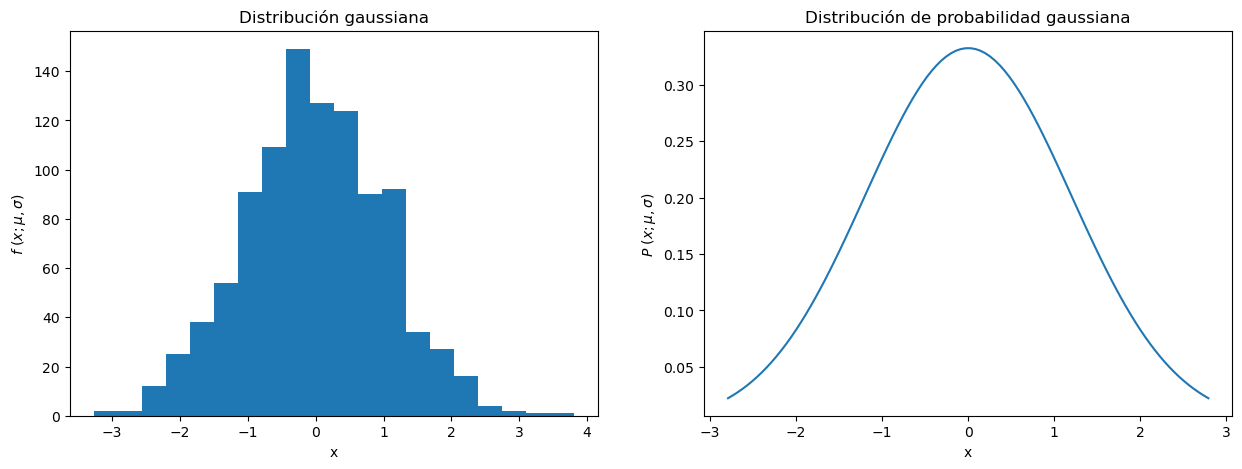

In [6]:
# Función gaussiana
from scipy.stats import norm

norm_rnd = norm.rvs(size=1000)
mu, sigma = 0, 1.2 # media y desviación estandar

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(norm_rnd, 20)
plt.title('Distribución gaussiana')
plt.ylabel('$f~(x;\mu,\sigma)$ ')
plt.xlabel('x')

plt.subplot(1,2,2)
gausspdf = st.norm(mu, sigma)
x = np.linspace(gausspdf.ppf(0.01),
                gausspdf.ppf(0.99), 100)
gp = gausspdf.pdf(x) # Función de Probabilidad
plt.plot(x, gp)
plt.title('Distribución de probabilidad gaussiana')
plt.ylabel('$P~(x;\mu,\sigma)$ ')
plt.xlabel('x')


## Distribución de Poisson

$f(n;\nu)=\frac{\nu^n}{n!}e^{-\nu}$ 

1. $n$ discreto; $\nu$ continua
2. Describe la probabilidad de que $n$ eventos sucedan, cuando la probabilidad de expectación es $\nu$
3. Su desviación estándar es $\sigma=\sqrt{\nu}$
4. Funciona mejor mientras mas grande sea $n$

Text(0.5, 0, 'x')

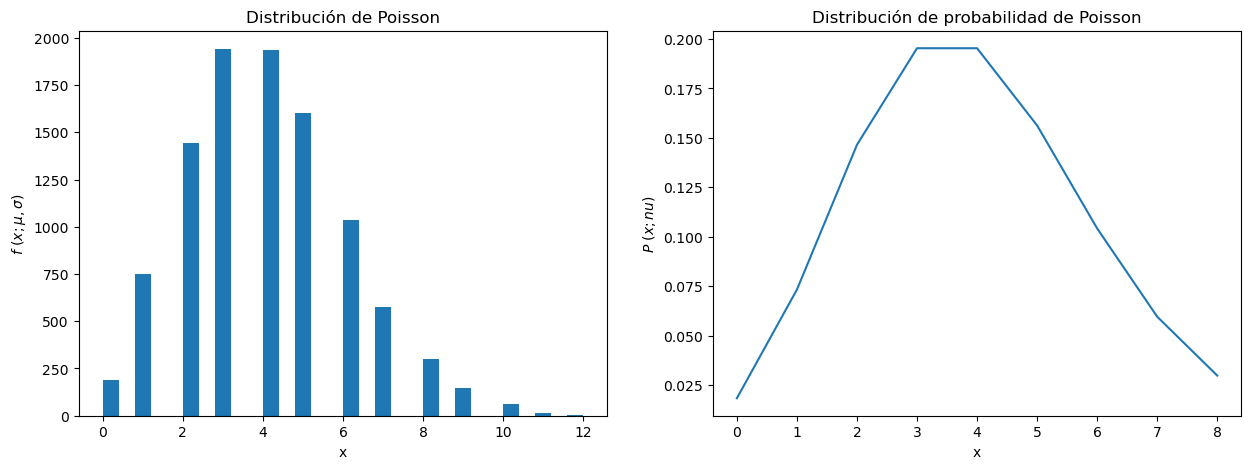

In [7]:
# Función de Poisson

from scipy.stats import poisson

nu = 4
poisson_rnd = poisson.rvs(nu, 0, 10000)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(poisson_rnd, 30)
plt.title('Distribución de Poisson')
plt.ylabel('$f~(x;\mu,\sigma)$ ')
plt.xlabel('x')

plt.subplot(1,2,2)
poissonpdf = poisson(nu)
x = np.arange(poissonpdf.ppf(0.01),
              poissonpdf.ppf(0.99))
pp = poisson.pmf(x,nu) # Función de Probabilidad
plt.plot(x, pp)
plt.title('Distribución de probabilidad de Poisson')
plt.ylabel('$P~(x;nu ) $ ')
plt.xlabel('x')

## Distribución binomial
$f(r;N,p) = \frac{N!}{r!(N-r)!}p^r(1-p)^{n-r}$

1. $\binom{N}{r}=\frac{N!}{r!(N-r)!}$ combinaciones de N en r; $q=1-p$
2. Probabilidad de tener $r$ casos acertados de $N$ eventos, dada una probabilidad intrínseca de $p$
3. Desviación estrndar $\sigma=\sqrt{Npq}$
4. Cuando $p$ es muy grande, se aproxima a la distribución de Poisson
5. Cuando $p$ es muy grande y $N$ también es muy grande, se aproxima a una distribución gaussiana
6. Si existen varias proabilidades intrínsecas $p_n={p_1,p_2,...p_n}$ entonce la distibución binomial es:

$f(r_i;N,p_i)=\frac{N!}{\prod r_i!}\prod p_i^{r_i}$

Text(0.5, 0, 'r')

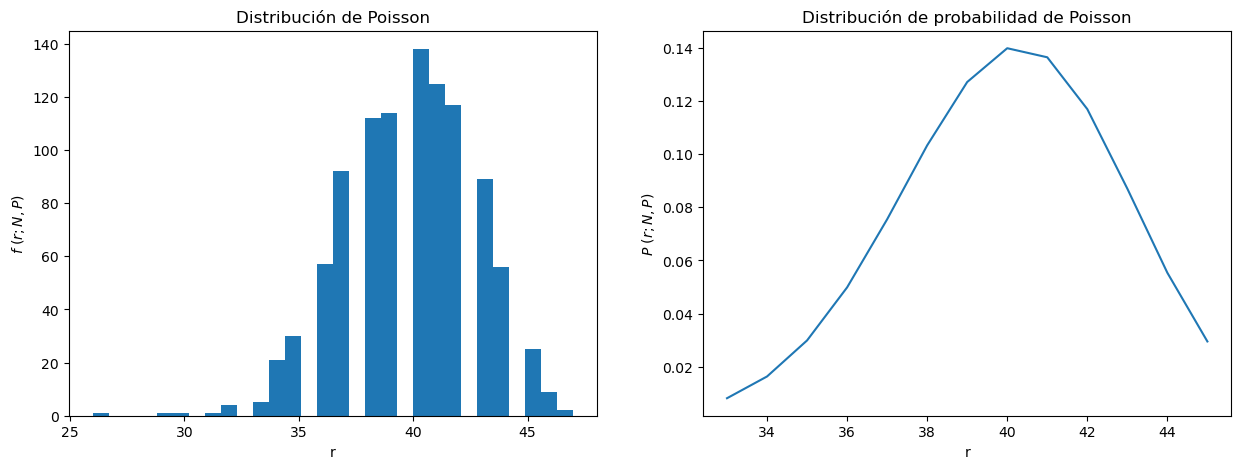

In [8]:
# Función Binomial
from scipy.stats import binom
n, p = 50, 0.8
binom_rnd = binom.rvs(n, p, size=1000)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
binomial = plt.hist(binom_rnd, 30)
plt.title('Distribución de Poisson')
plt.ylabel('$f~(r; N, P)$ ')
plt.xlabel('r')

plt.subplot(1,2,2)
binompdf = binom(n, p)
x = np.arange(binom.ppf(0.01,n,p),
              binom.ppf(0.99,n,p))
bp = binompdf.pmf(x) # Función de Probabilidad
plt.plot(x, bp)
plt.title('Distribución de probabilidad de Poisson')
plt.ylabel('$P~(r; N, P ) $ ')
plt.xlabel('r')

##  Distribución de Breit-Wigner (Cauchy)

$f(E;M,\Gamma) =\frac{1}{2\pi} \frac{\Gamma}{(E-M)^2+(\Gamma/2)^2}$

1. Variación de la energía de la sección eficaz de producida en la formación de un estado con masa $M$ y anchura $\Gamma$ 
2. Si $x=\frac{E-M}{\Gamma/2}$ entonces $f(x)=\frac{1}{\pi}\frac{1}{1+x^2}$ (Cauchy)

## Distribución de Landau
$f(\lambda)=\frac{1}{\pi}\int_0^\infty e^{-u ln u -\lambda u} \sin(\pi u)du$

1. Distribución de probabilidad de la pérdida de energía de una partícula cargada en presencia de un campo electromagnético.
2. $\Delta$ es la energía pérdida a partir de una energía inicial $\Delta_0$
3. El pico de la distribución se encuentra en $\lambda=\Delta-\Delta_0/\xi$, donde $\xi$ es una escala que depende del material.

## Distribución binomial negativa
$f(r;k,p) = \frac{(k+r-1)!}{r!(k-1)!}q^k p^r$

1. Probabilidad de que $r$ casos acertados en $N$ permutaciones, antes de tener $k$ casos erroneos
2. Permutaciones: $\binom{-k}{r}=(-1)\frac{(k+r-1)!}{r!(k-1)!}$
3. Casoos erroneos $q=1-p$
4. Valor medio $\nu=\frac{p}{q}k$ y la varianza $V=\frac{p}{q^2}$
5. Para $p$ muy grande, $k$ muy pequeña y $\mu=pk$ la distribución binomial negativa se aproxima a una distribución de Poisson

## Distribución de Student

$f(t;n)=\frac{\Gamma(\frac{n+1}{2})}{\sqrt{n\pi}\Gamma(\frac{n}{2})}(1+\frac{t^2}{2})^{\frac{n+1}{2}}$

1. $t=\frac{x-\mu}{\sigma}$ 
2. Para n muy grande la distribución de Studen se aproxima a una distribución gaussiana
3. Para n muy chicas, el ancho de la districución aumenta

## Distribución $\chi^2$

La desviación cuadrática media de una función $g(x)$ y $n$ mediciones de ${(x_i,y_i)}$ es:

$\chi^2=\sum_{i=1}^{n}\left(\frac{\gamma_i - g(x_i)}{\sigma_i}\right)^2$

donde $\sigma_i$ es el error gaussiano de la i-ésima medición.

Cada término contribuye al error, por lo que $E[f(\chi^2;n)]=n$ donde $\sigma=\sqrt{2n}$ y $f(\chi^2;n)$ es la distribución $\chi^2$:

$f(\chi^2;n)=\frac{2^{-n/2}}{\Gamma(n/2)}\chi^{n-2}e^{-\chi^2/2}$

1. $\chi^2$ nos dice si las mediciones son comparables con el modelo
2. Grados de libertad: n-$\theta$ donde $\theta$ es el número de parámetros del ajuste

<div> <img src="fig/distributions.png" alt="Drawing" style="width: 500px;"/></div>

https://www.indiumsoftware.com/blog/statistical-distributions/


# fitter: Esta librería permite ajustar distribuciones a los datos.

https://pypi.org/project/fitter/0.2.0/

$ pip install fitter

In [9]:
mainpath = "../datasets/"
filename = "titanic-kaggle/train.csv"
fullpath = os.path.join(mainpath, filename)
data = pd.read_csv (fullpath)
data1 = data
data1 = data1.drop(['Cabin','Name','Ticket'], axis=1)
data1 = data1[data1['Embarked'].notna()]
data1['Age'] = data1['Age'].fillna(-1)

### Datos ordinales

data1['Embarked'] = data1['Embarked'].map({'Q': 2, 'C': 1, 'S': 0})
data1['Sex'] = data1['Sex'].map({'female': 1, 'male': 0})
data1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0
887,888,1,1,1,19.0,0,0,30.0000,0
888,889,0,3,1,-1.0,1,2,23.4500,0
889,890,1,1,0,26.0,0,0,30.0000,1


In [10]:
# 80 distribuciones
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']
# Atributo
fitter = Fitter(data1.Age, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 13.69it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.035070,1127.911325,-8994.535452,inf,0.497298,1.143109e-203
exponpow,0.044166,987.300389,-8789.525169,inf,0.263349,6.715207e-55
beta,0.045987,1001.955063,-8746.809909,inf,0.294749,6.132533e-69
expon,0.060961,974.127620,-8509.805260,inf,0.212721,8.834374e-36
powerlaw,0.063041,889.592552,-8473.194867,inf,0.286944,2.733075e-65
norm,0.063534,1016.136447,-8473.058055,inf,0.114818,1.149479e-10
logistic,0.063777,1002.020523,-8469.670835,inf,0.111754,3.983705e-10
gamma,0.064290,985.506313,-8455.749770,inf,0.132618,4.281621e-14
cauchy,0.064409,1016.049500,-8460.895642,inf,0.127785,4.093053e-13


* sumsquare_error: Akaike information criterion (aic) $\rightarrow 2k-ln(L)$. *k* es el número de parámetros en el modelo estadístico, y *L* es el máximo valor de la función de verosimilitud para el modelo estimado.

https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_de_Akaike

* bayesian information criterion (bic) $\rightarrow kln(n)-2ln(L)$ 

https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_bayesiano

* ks_statistic: Kolmogorov–Smirnovit. Compara las dos distribuciones acumulativas y devuelve la diferencia máxima entre ellas.

https://es.wikipedia.org/wiki/Prueba_de_Kolmog%C3%B3rov-Smirnov

Por defecto, la función clasifica las cinco mejores distribuciones según los valores de **sumsquare_error** en orden ascendente.

In [13]:
fitter.get_best(method = 'sumsquare_error')

{'chi2': {'df': 0.6968445674910628,
  'loc': -1.0000000000000002,
  'scale': 16.301274391292623}}

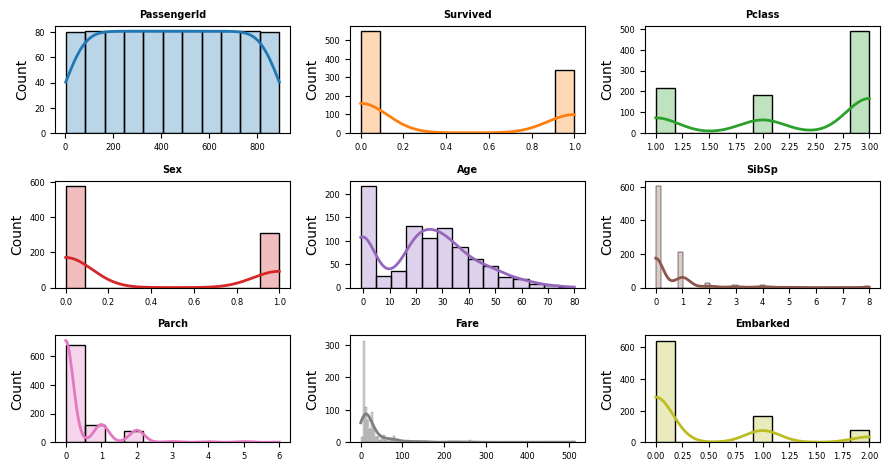

In [12]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
for i, colum in enumerate(data1):
    sns.histplot(
        data     = data1,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
